In [1]:
import numpy as np
import pandas as pd



ejection_data = pd.read_csv(r"/Users/vsoma_ogh6dsk/ejections.csv")
ejection_data.take(np.arange(-10, -1, 1))
ejection_data


,GAMEID,DATE,DH,EJECTEE,EJECTEENAME,TEAM,JOB,UMPIRE,UMPIRENAME,INNING,REASON
0,CL6188905250,05/25/1889,,orr-d101,Dave Orr,CL6,P,goldf101,Fred Goldsmith,-1,Call at 3B
1,BL2188905280,05/28/1889,,tuckt103,Tommy Tucker,BL2,P,gaffj801,John Gaffney,-1,Yelling at OF chasing fly
2,WS8188906010,06/01/1889,,ewinb101,Buck Ewing,NY1,P,currw101,Wes Curry,-1,Obscene language
3,WS8188907300,07/30/1889,,ewinb101,Buck Ewing,NY1,P,bakep101,Phil Baker,-1,Call at 1B
4,LS2188908100,08/10/1889,,raymh101,Harry Raymond,LS2,P,goldf101,Fred Goldsmith,-1,Call at 2B
...,...,...,...,...,...,...,...,...,...,...,...
18927,NYN202209270,09/27/2022,,mattd001,Don Mattingly,MIA,M,blakr901,Ryan Blakney,8,Balk calls
18928,NYN202209270,09/27/2022,,bleir001,Richard Bleier,MIA,P,blakr901,Ryan Blakney,8,Balk calls
18929,HOU202209280,09/28/2022,,rojaj001,Josh Rojas,ARI,P,porta901,Alan Porter,6,Called third strike (Threw bat and helmet)
18930,HOU202209280,09/28/2022,,lovut001,Torey Lovullo,ARI,M,porta901,Alan Porter,6,Called third strike


In [2]:
def date_to_year(date):
    return int(date.split("/")[-1])

ejection_data = ejection_data.assign(YEAR = ejection_data.get("DATE").apply(date_to_year))
recent_ejections = ejection_data[ejection_data.get("YEAR") >= 1993]

In [3]:
np.sort(recent_ejections.get("TEAM").unique())

array(['ANA', 'ARI', 'ATL', 'BAL', 'BOS', 'CAL', 'CHA', 'CHN', 'CIN',
       'CLE', 'COL', 'DET', 'FLO', 'HOU', 'KCA', 'LAN', 'MIA', 'MIL',
       'MIN', 'MON', 'NYA', 'NYN', 'OAK', 'PHI', 'PIT', 'SDN', 'SDP',
       'SEA', 'SFN', 'SLN', 'TBA', 'TEX', 'TOR', 'WAS'], dtype=object)

In [4]:
print("Unique jobs:", recent_ejections.get("JOB").unique())
recent_ejections[recent_ejections.get("JOB") == 'C']

Unique jobs: ['P' 'M' 'C' 'N' 'T']


,GAMEID,DATE,DH,EJECTEE,EJECTEENAME,TEAM,JOB,UMPIRE,UMPIRENAME,INNING,REASON,YEAR
12899,NYN199305080,05/08/1993,,raded103,Doug Rader,FLO,C,ripps901,Steve Rippley,3,Called third strike,1993
12900,BAL199305100,05/10/1993,,easlm001,Mike Easler,BOS,C,garcr901,Rich Garcia,8,Called third strike,1993
12906,COL199305120,05/12/1993,,hassr001,Ron Hassey,COL,C,mcshj901,John McSherry,9,Fighting,1993
12908,COL199305120,05/12/1993,,bondb101,Bobby Bonds,SFN,C,mcshj901,John McSherry,9,Fighting,1993
12912,CAL199305150,05/15/1993,,wathj001,John Wathan,CAL,C,cobld901,Drew Coble,1,Called third strike,1993
...,...,...,...,...,...,...,...,...,...,...,...,...
18879,SLN202208070,08/07/2022,,blakm801,Matt Blake,NYA,C,carav901,Vic Carapazza,5,Balls and strikes,2022
18886,SFN202208160,08/16/2022,,banij001,Jeff Banister,ARI,C,blasc901,Cory Blaser,9,Balls and strikes,2022
18889,CHA202208180,08/18/2022,,cinta001,Alex Cintron,HOU,C,dejer901,Ramon DeJesus,1,Called third strike,2022
18902,MIL202208270,08/27/2022,,napom001,Mike Napoli,CHN,C,gonzm901,Manny Gonzalez,7,Called third strike,2022


In [5]:
total_recent_ejections = recent_ejections.shape[0]
total_player_ejections = recent_ejections[recent_ejections.get("JOB") == 'P'].shape[0]
print(f"Proportion of player ejections: {round(total_player_ejections/total_recent_ejections, 2)}")


Proportion of player ejections: 0.49


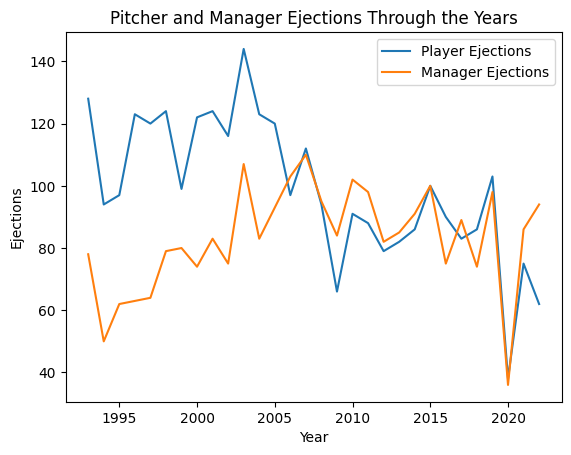

In [6]:
ejection_by_job = recent_ejections.groupby(["JOB", "YEAR"]).count()
ejection_by_job = ejection_by_job.assign(COUNT = ejection_by_job.get('GAMEID')).get(['COUNT']).reset_index()
pitcher_ejections = ejection_by_job[ejection_by_job.get('JOB') == 'P'].assign(pitcher = ejection_by_job.get("COUNT"))
pitcher_plot = pitcher_ejections.plot(kind = "line", x = "YEAR", y = "COUNT", label = "Player Ejections")
manager_ejections = ejection_by_job[ejection_by_job.get('JOB') == 'M']
manager_ejections.plot(
    ax = pitcher_plot, kind = "line", x = "YEAR", y= "COUNT",
    label = "Manager Ejections",title = "Pitcher and Manager Ejections Through the Years",
    ylabel = "Ejections", xlabel = "Year"
                       );

In [7]:
def reasons_by_phrase(phrase):  
    phrase = phrase.casefold()
    return (recent_ejections[(recent_ejections.get('JOB') == 'P')
                    & (recent_ejections.get('REASON').str.casefold()
                    .str.contains(phrase))].get('REASON').unique())
reasons_by_phrase('Intentional HBP')

array(['Intentional HBP', 'Intentional HBP after warning',
       'Arguing ejections on intentional HBP', 'Arguing intentional HBP'],
      dtype=object)

In [8]:
def is_intentional_hbp(reason):
    ''' Returns true if reason indicates hbp caused a pitcher ejection. Looks for keywords in reason that would indicate it'''
    casefold_reason = reason.casefold()
    # Things that might be misinterpreted as keywords
    not_keywords = (
        ["arguing", "argued"]
               )
    for not_keyword in not_keywords:
        if not_keyword in casefold_reason:
            return False
    keywords = (
        ["intentional hbp", "intentionally hitting batter",
         "throwing at batter", "threw at batter", \
         "automatic ejection on hbp", "automatic ejection for hbp",
         "throwing behind batter", "hit by pitch after warning, intentional hit by pitch",
         "hit by pitch after previous warnings, hitting batter while under warning",
         "hit batter after warning, intentional hit by pitch"]
               )
    for keyword in keywords:
        if keyword in casefold_reason:
            return True
    return False

# Only look at players' ejections, so that manager and pitcher both getting ejected isn't double-counted
intentional_hbps = recent_ejections[(recent_ejections.get('JOB') == 'P') 
                                    & (recent_ejections.get('REASON').apply(is_intentional_hbp))]
intentional_hbps = intentional_hbps.drop(columns = ['JOB', 'UMPIRE', 'UMPIRENAME'])
intentional_hbps.get('REASON').unique()


array(['Throwing at batter', 'Intentional HBP',
       'Throwing at batter after warning', 'Throwing behind batter',
       'Automatic ejection for throwing at batter after warning',
       'Automatic ejection for HBP after warning',
       'Intentional HBP after warning',
       'Automatic ejection on HBP after warning',
       'Intentionally throwing at batter', 'Fighting (Threw at batter)',
       'Intentionally hitting batter'], dtype=object)

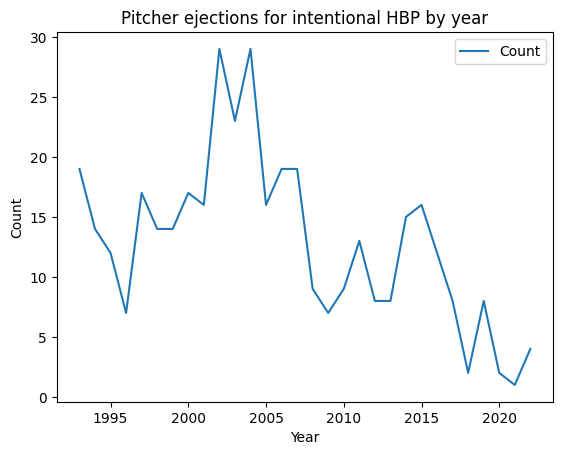

In [9]:

intentional_hbps_by_year = intentional_hbps.groupby('YEAR').count()
intentional_hbps_by_year = intentional_hbps_by_year.assign(Count = intentional_hbps_by_year.get('GAMEID')).get(['Count'])
(
    intentional_hbps_by_year.reset_index().plot(kind = "line", x = "YEAR", y = "Count", 
    xlabel = "Year", ylabel = "Count", title = "Pitcher ejections for intentional HBP by year")
);


In [10]:
intentional_hbps_by_pitcher = intentional_hbps.groupby("EJECTEENAME").count()
intentional_hbps_by_pitcher = intentional_hbps_by_pitcher.assign(
    Count = intentional_hbps_by_pitcher.get('DH')
).get(['Count']).sort_values(by = 'Count', ascending = False)
intentional_hbps_by_pitcher

,Count
EJECTEENAME,
Bartolo Colon,4
Jeff Juden,3
Randy Johnson,3
Carlos Zambrano,3
Jose Bautista,3
...,...
Jason Christiansen,1
Jared Hughes,1
Jamie Walker,1


In [11]:
intentional_hbps[intentional_hbps.get('EJECTEENAME') == 'Pablo Lopez']

,GAMEID,DATE,DH,EJECTEE,EJECTEENAME,TEAM,INNING,REASON,YEAR


In [12]:
recent_ejections.get('REASON').unique()

array(['Throwing at batter', 'Balk call', 'Balls and strikes',
       'Bench jockeying', 'Protesting umpire order to pitch',
       'Called third strike', 'Balls and strikes (After removal)',
       'Fighting', 'Intentional HBP', 'Call at 1B', 'Call at 3B',
       'Called third strike (Threw equipment)', 'Check swing',
       'Charging mound', 'Catch/trap', 'Call at HP',
       'Argument over batting order',
       '[Held nose; mascot] Catch/trap call', 'Bench-clearing brawl',
       'Balk non-call', 'Interference call', 'Fair/foul call',
       'Call at 2B', 'Call at HP (Bumped umpire)',
       'Throwing at batter after warning',
       'Trying to fight opposing manager', 'Call at 1B (Threw helmet)',
       'Charging opposing manager after HBP',
       'Call in previous game; Pregame meeting', 'HBP non-call',
       'Non-warning to pitcher', 'Warning to both teams',
       'Charging mound after HBP',
       'Arguing that pitcher should be ejected', 'Throwing behind batter',
       'Ba

In [13]:
intentional_hbps = intentional_hbps.get(['DATE', 'TEAM', 'REASON', 'YEAR'])
intentional_hbps

,DATE,TEAM,REASON,YEAR
12874,04/08/1993,NYA,Throwing at batter,1993
12888,04/27/1993,BOS,Intentional HBP,1993
12949,06/10/1993,LAN,Intentional HBP,1993
12951,06/11/1993,CHN,Intentional HBP,1993
12954,06/11/1993,CHN,Intentional HBP,1993
...,...,...,...,...
18612,05/18/2021,MIN,Throwing at batter,2021
18755,04/08/2022,WAS,Intentionally hitting batter,2022
18757,04/09/2022,CHN,Intentionally hitting batter,2022
18785,05/10/2022,TOR,Intentionally hitting batter,2022


In [14]:
recent_intentional_hbps = intentional_hbps[intentional_hbps.get('YEAR') >= 2008].reset_index().drop(columns = ['index'])
recent_intentional_hbps

,DATE,TEAM,REASON,YEAR
0,05/20/2008,NYA,Throwing at batter,2008
1,06/13/2008,SLN,Intentional HBP,2008
2,07/19/2008,TOR,Intentional HBP,2008
3,07/29/2008,BAL,Intentional HBP,2008
4,07/30/2008,NYA,Throwing at batter,2008
...,...,...,...,...
117,05/18/2021,MIN,Throwing at batter,2021
118,04/08/2022,WAS,Intentionally hitting batter,2022
119,04/09/2022,CHN,Intentionally hitting batter,2022
120,05/10/2022,TOR,Intentionally hitting batter,2022


In [15]:
csv_hbps = recent_intentional_hbps.to_csv()
file_path = 'intentional_hbps.csv'
with open(file_path , 'w') as f:
    f.write(csv_hbps)